# Data Manipulation Pandas - Jeopardy Project
## Project Goals

>You will work to write several functions that investigate a dataset of 'Jeopardy!' questions and answers. Filter the dataset for topics that you’re interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion.

## Project Requirements
>We’ve provided a csv file containing data about the game show 'Jeopardy!' in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.
>
>Note that in order to make this project as "real-world" as possible, we haven’t modified the data at all — we’re giving it to you exactly how we found it. As a result, this data isn’t as "clean" as the datasets you normally find on Codecademy. More specifically, there’s something odd about the column names. After you figure out the problem with the column names, you may want to rename them to make your life easier the rest of the project.

## Load and Clean the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
jeopardy_data = pd.read_csv('./materials/jeopardy.csv',
                            parse_dates = [' Air Date']
                           )
jeopardy_data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [3]:
jeopardy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Show Number  216930 non-null  int64         
 1    Air Date    216930 non-null  datetime64[ns]
 2    Round       216930 non-null  object        
 3    Category    216930 non-null  object        
 4    Value       216930 non-null  object        
 5    Question    216930 non-null  object        
 6    Answer      216928 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.6+ MB


### Clean column names
There is a space in front of the names, remove and lower case.

In [4]:
jeopardy_data.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [5]:
jeopardy_data.rename(columns = {'Show Number': 'show_num',
                               ' Air Date': 'air_date',
                               ' Round': 'rounds',
                               ' Category': 'category',
                               ' Value': 'price',
                               ' Question': 'question',
                               ' Answer': 'answer'
                              }, inplace = True)

### Check for duplicates

In [6]:
jeopardy_data.duplicated().value_counts()

False    216930
dtype: int64

In [7]:
jeopardy_data.question.duplicated().value_counts()

False    216124
True        806
Name: question, dtype: int64

In [8]:
jeopardy_data[(jeopardy_data.question.duplicated()) & (jeopardy_data.category == 'NOTHING')]

,show_num,air_date,rounds,category,price,question,answer


### Clean `price` column
+ Remove `$` and `,` and convert to numeric (float).


+ Check for missing values: replace `'None'` with `0` (I am considering `'None'` as zero dollars, and not as `NaN`)

In [9]:
jeopardy_data.price.sort_values().unique()

array(['$1,000', '$1,020', '$1,100', '$1,111', '$1,183', '$1,200',
       '$1,203', '$1,246', '$1,263', '$1,300', '$1,347', '$1,400',
       '$1,407', '$1,492', '$1,500', '$1,512', '$1,534', '$1,600',
       '$1,700', '$1,777', '$1,800', '$1,801', '$1,809', '$1,810',
       '$1,900', '$10,000', '$10,400', '$10,800', '$100', '$1000',
       '$11,000', '$11,200', '$11,600', '$12,000', '$12,400', '$1200',
       '$13,000', '$13,200', '$13,800', '$14,000', '$14,200', '$16,400',
       '$1600', '$18,000', '$2,000', '$2,001', '$2,021', '$2,100',
       '$2,127', '$2,200', '$2,222', '$2,300', '$2,344', '$2,400',
       '$2,500', '$2,600', '$2,700', '$2,746', '$2,800', '$2,811',
       '$2,900', '$2,990', '$20', '$200', '$2000', '$22', '$250', '$2547',
       '$3,000', '$3,100', '$3,150', '$3,200', '$3,201', '$3,300',
       '$3,389', '$3,400', '$3,499', '$3,500', '$3,599', '$3,600',
       '$3,700', '$3,800', '$3,900', '$3,989', '$300', '$350', '$367',
       '$4,000', '$4,008', '$4,100', '$4

In [10]:
jeopardy_data.price.replace('\$(?P<dig1>\d+),?(?P<dig2>\d+)?$','\g<dig1>\g<dig2>', regex = True, inplace = True)
jeopardy_data.price.replace('None', 0, regex = True, inplace = True)

In [11]:
jeopardy_data.price = pd.to_numeric(jeopardy_data.price, downcast='float')
jeopardy_data.price.sort_values().unique()

array([0.000e+00, 5.000e+00, 2.000e+01, 2.200e+01, 5.000e+01, 1.000e+02,
       2.000e+02, 2.500e+02, 3.000e+02, 3.500e+02, 3.670e+02, 4.000e+02,
       5.000e+02, 5.850e+02, 6.000e+02, 6.010e+02, 7.000e+02, 7.500e+02,
       7.960e+02, 8.000e+02, 9.000e+02, 1.000e+03, 1.020e+03, 1.100e+03,
       1.111e+03, 1.183e+03, 1.200e+03, 1.203e+03, 1.246e+03, 1.263e+03,
       1.300e+03, 1.347e+03, 1.400e+03, 1.407e+03, 1.492e+03, 1.500e+03,
       1.512e+03, 1.534e+03, 1.600e+03, 1.700e+03, 1.777e+03, 1.800e+03,
       1.801e+03, 1.809e+03, 1.810e+03, 1.900e+03, 2.000e+03, 2.001e+03,
       2.021e+03, 2.100e+03, 2.127e+03, 2.200e+03, 2.222e+03, 2.300e+03,
       2.344e+03, 2.400e+03, 2.500e+03, 2.547e+03, 2.600e+03, 2.700e+03,
       2.746e+03, 2.800e+03, 2.811e+03, 2.900e+03, 2.990e+03, 3.000e+03,
       3.100e+03, 3.150e+03, 3.200e+03, 3.201e+03, 3.300e+03, 3.389e+03,
       3.400e+03, 3.499e+03, 3.500e+03, 3.599e+03, 3.600e+03, 3.700e+03,
       3.800e+03, 3.900e+03, 3.989e+03, 4.000e+03, 

### Clean `rounds` column
`rounds` only has five possible values. Convert to dtype "category".

In [12]:
jeopardy_data.rounds.unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

In [13]:
jeopardy_data['rounds'] = jeopardy_data['rounds'].astype("category")

### Clean `show_num` column
Read by pd.read_csv() as an integer. It takes a relatively high number of possible values => convert to object

In [14]:
jeopardy_data['show_num'] = jeopardy_data.show_num.astype("object")

In [15]:
jeopardy_data.show_num.describe()

count     216930
unique      3640
top         2941
freq          62
Name: show_num, dtype: int64

There are data from 3640 different shows of Jeopardy

### Clean `category` column
Leave it as object

In [16]:
jeopardy_data.category.describe()

count             216930
unique             27995
top       BEFORE & AFTER
freq                 547
Name: category, dtype: object

### Clean `air_date` column
It seems ok

In [17]:
jeopardy_data.air_date.describe(datetime_is_numeric=True)

count                           216930
mean     2003-03-08 00:06:26.734891648
min                1984-09-10 00:00:00
25%                1999-03-11 00:00:00
50%                2004-02-27 00:00:00
75%                2008-02-06 00:00:00
max                2012-01-27 00:00:00
Name: air_date, dtype: object

### Clean `answer` column
There are a couple of missing values in this column. `pd.read_csv()` loads 'null' as NaN by default. I am keeping it as default when loading and checking the NaN entries to confirm if they are proper `NaN`s (missing values) or if the answer in Jeopardy was 'null'. 

In [18]:
jeopardy_data.answer[jeopardy_data.answer.isnull()]

94817     NaN
143297    NaN
Name: answer, dtype: object

In [19]:
jeopardy_data.iloc[143297]

show_num                                                 6177
air_date                                  2011-06-21 00:00:00
rounds                                       Double Jeopardy!
category                                              NOTHING
price                                                   400.0
question    This word for "nothing" precedes "and void" to...
answer                                                    NaN
Name: 143297, dtype: object

In [20]:
jeopardy_data.iloc[94817]

show_num                            4346
air_date             2003-06-23 00:00:00
rounds                         Jeopardy!
category                   GOING "N"SANE
price                              200.0
question    It often precedes "and void"
answer                               NaN
Name: 94817, dtype: object

In both cases the answer was 'null', they are not really missing values.

In [21]:
jeopardy_data.answer.replace(np.nan, 'null', inplace= True)

In [22]:
jeopardy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   show_num  216930 non-null  object        
 1   air_date  216930 non-null  datetime64[ns]
 2   rounds    216930 non-null  category      
 3   category  216930 non-null  object        
 4   price     216930 non-null  float32       
 5   question  216930 non-null  object        
 6   answer    216930 non-null  object        
dtypes: category(1), datetime64[ns](1), float32(1), object(4)
memory usage: 9.3+ MB


## Question 3-4
>Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 152 rows. Every row had the strings "King" and "England" somewhere in its " Question"

In [23]:
import re

In [24]:
pd.set_option('display.max_colwidth', None)

In [25]:
word = 'King'
#pattern = '\s{word}\s'.format(word = word)
pattern = re.compile(r"\b{word}\b".format(word = word), re.IGNORECASE)
pattern
jeopardy_data.question.str.contains( pattern, regex = True).value_counts()

False    214186
True       2744
Name: question, dtype: int64

The function below searches any lists of strings in a column of the database, and returns only the rows that contains all the strings in the list of strings (case insensitive).

In [26]:
def search_list_strings(dataframe, column_name, words):
    partial_matches = pd.DataFrame()
    for word in words:
    #pattern = '\s{word}\s'.format(word = word)
        pattern = '{word}'.format(word = word)
        partial_matches[word] = dataframe[column_name].str.contains( pattern, case = False, regex = True)

    return dataframe[partial_matches.all(axis = 'columns')]

In [27]:
pd.set_option('display.max_rows', 200)
word_list = ['King', 'England']

king_england = search_list_strings(jeopardy_data, 'question', word_list)
king_england.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 4953 to 216789
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   show_num  152 non-null    object        
 1   air_date  152 non-null    datetime64[ns]
 2   rounds    152 non-null    category      
 3   category  152 non-null    object        
 4   price     152 non-null    float32       
 5   question  152 non-null    object        
 6   answer    152 non-null    object        
dtypes: category(1), datetime64[ns](1), float32(1), object(4)
memory usage: 8.1+ KB


In [28]:
king_england

,show_num,air_date,rounds,category,price,question,answer
4953,3003,1997-09-24,Double Jeopardy!,"""PH""UN WORDS",200.0,"Both England's King George V & FDR put their stamp of approval on this ""King of Hobbies""",Philately (stamp collecting)
6337,3517,1999-12-14,Double Jeopardy!,Y1K,800.0,"In retaliation for Viking raids, this ""Unready"" king of England attacks Norse areas of the Isle of Man",Ethelred
9191,3907,2001-09-04,Double Jeopardy!,WON THE BATTLE,800.0,This king of England beat the odds to trounce the French in the 1415 Battle of Agincourt,Henry V
11710,2903,1997-03-26,Double Jeopardy!,BRITISH MONARCHS,600.0,"This Scotsman, the first Stuart king of England, was called ""The Wisest Fool in Christendom""",James I
13454,4726,2005-03-07,Jeopardy!,A NUMBER FROM 1 TO 10,1000.0,It's the number that followed the last king of England named William,4
14445,1103,1989-05-24,Jeopardy!,FAMOUS QUOTES,300.0,"Nelson said, ""England expects that every man will do"" this & died thanking God he did his",his duty
14912,2832,1996-12-17,Jeopardy!,WORLD HISTORY,100.0,"This country's King Louis IV was nicknamed ""Louis From Overseas"" because he was raised in England",France
16475,5816,2009-12-21,Jeopardy!,THEY WERE CONTEMPORARIES,200.0,There was good kinging in the 800s--Leo the Wise ruled the Byzantine Empire while England had Alfred the this,the Great
18076,3227,1998-09-22,Double Jeopardy!,WORLD HISTORY,1000.0,In 1199 this crusader king of England was mortally wounded while besieging the castle of Chalus,Richard the Lionhearted
19104,3322,1999-02-02,Jeopardy!,HISTORIC NAMES,200.0,"Name of 8 kings of England since 1272, it was also General Lee's middle name",Edward


>Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

The function above retuns the expected number of rows in the example from codecademy (152), but it is not really searching for words... it searches for the strings anywhere. For example searching for 'King' will return rows that contain 'thanking, 'making', 'taking', 'kingdom', etc.

To search for words:

In [29]:
def search_list_words(dataframe, column_name, words):
    partial_matches = pd.DataFrame()
    for word in words:
        pattern = re.compile(r"\b{word}\b".format(word = word), re.IGNORECASE)
        partial_matches[word] = dataframe[column_name].str.contains( pattern, regex = True)

    return dataframe[partial_matches.all(axis = 'columns')]

In [30]:
word_list = ['King', 'England']

king_england_words = search_list_words(jeopardy_data, 'question', word_list)
king_england_words.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 4953 to 216021
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   show_num  118 non-null    object        
 1   air_date  118 non-null    datetime64[ns]
 2   rounds    118 non-null    category      
 3   category  118 non-null    object        
 4   price     118 non-null    float32       
 5   question  118 non-null    object        
 6   answer    118 non-null    object        
dtypes: category(1), datetime64[ns](1), float32(1), object(4)
memory usage: 6.3+ KB


We get 118 rows with this second patten vs. 152 rows with the first one. To check which rows are being excluded with this second pattern:

In [31]:
check_kings = pd.concat([king_england, king_england_words])
len(check_kings[~check_kings.duplicated(keep = False)])

34

In [32]:
check_kings[~check_kings.duplicated(keep = False)]

,show_num,air_date,rounds,category,price,question,answer
14445,1103,1989-05-24,Jeopardy!,FAMOUS QUOTES,300.0,"Nelson said, ""England expects that every man will do"" this & died thanking God he did his",his duty
16475,5816,2009-12-21,Jeopardy!,THEY WERE CONTEMPORARIES,200.0,There was good kinging in the 800s--Leo the Wise ruled the Byzantine Empire while England had Alfred the this,the Great
19104,3322,1999-02-02,Jeopardy!,HISTORIC NAMES,200.0,"Name of 8 kings of England since 1272, it was also General Lee's middle name",Edward
35478,6128,2011-04-13,Double Jeopardy!,AN AUTHOR IS BORN,1200.0,"Born in Bedfordshire, England in 1628, he was making ""Progress"" from the start",(John) Bunyan
36360,4786,2005-05-30,Double Jeopardy!,WHERE AM I?,400.0,"(<a href=""http://www.j-archive.com/media/2005-05-30_DJ_26.jpg"" target=""_blank"">Jimmy of the Clue Crew holds a block of cheese</a>.) I'm in this Midwest state famous for making cheddar, which actually originated in a village in England",Wisconsin
51986,4689,2005-01-13,Double Jeopardy!,19th CENTURY NOTABLES,800.0,"This associate of Marx wrote about ""the condition of the working class in England in 1844""",Engels
58112,739,1987-11-19,Final Jeopardy!,RULERS,0.0,The only name shared by four consecutive kings of England,George (I - IV)
60601,4796,2005-06-13,Double Jeopardy!,CLASSICAL MUSIC,1200.0,"He was working on his 3rd symphony when he died in England in 1934; it premiered in 1998 amid much ""pomp""",(Sir Edward) Elgar
69991,5393,2008-02-06,Double Jeopardy!,MISSING,1600.0,"Chronological lists of England's kings are missing 1649-1660, between 2 kings of this name",Charles
74611,3153,1998-04-22,Double Jeopardy!,GUYS WHO FOUND THINGS,1000.0,In 1497 this Venetian sailing for England became the first European since the Vikings to reach N. America,John Cabot


Excluded all "-king" words, but includes forms like "England's" (it is the kind of behavior that we want).   

Some of the excluded rows contain the plural of king ('kings'). If we would like to include it in our results we can change the regex pattern to:

```python
pattern = re.compile(r"\b{word}s?\b".format(word = word), re.IGNORECASE)
```

## Question 5
>Now that you can filter the dataset of question, use the price  values of each question to find the “difficulty” of certain topics. For example, what is the average value of questions that contain the word "King"?

Average price for questions in our 'Jeopardy' dataset and other basic statistics:

In [33]:
jeopardy_data['price'].describe()

count    216930.000000
mean        739.988464
std         639.822693
min           0.000000
25%         400.000000
50%         600.000000
75%        1000.000000
max       18000.000000
Name: price, dtype: float64

Average price for questions that contain the word "King":

In [34]:
search_list_words(jeopardy_data, 'question', ['King',]).price.mean()

803.2981

The average price for questions that contain the word "king" is a bit higher than that of the average question. To check the percentile that corresponds to \$803 we can use the `stats.percentileofscore` from `scipy`:

In [35]:
from scipy import stats

In [36]:
stats.percentileofscore(jeopardy_data['price'], 803.29)

71.68579726178952

~71,7% of the questions in the dataset have a price below the average price for questions that contain 'king'.

## Question 6
>Write a function that returns the count of the unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word "King", we could then find all of the unique answers to those questions. The answer "Henry VIII" appeared 3 times and was the most common answer.

In [37]:
def unique_answers_by_questions(dataframe, column_name, word_list):
    """Returns the count of unique answers after filtering a column by a list of words"""
    filtered_df = search_list_words(dataframe, column_name, word_list)
    return filtered_df.answer.value_counts()

In [38]:
pd.set_option('display.max_rows', 15)
unique_answers_by_questions(jeopardy_data, 'question', ['King', 'England'])

William the Conqueror      5
James I                    3
Richard the Lionhearted    3
George I                   3
Henry VIII                 3
                          ..
4                          1
James (I)                  1
Portugal                   1
James II                   1
George Frideric Handel     1
Name: answer, Length: 85, dtype: int64

Checking one of the entries. Ex: 'Richard the Lionhearted':

In [39]:
jeopardy_data[jeopardy_data.answer == 'Richard the Lionhearted']

,show_num,air_date,rounds,category,price,question,answer
18076,3227,1998-09-22,Double Jeopardy!,WORLD HISTORY,1000.0,In 1199 this crusader king of England was mortally wounded while besieging the castle of Chalus,Richard the Lionhearted
29905,4494,2004-03-04,Jeopardy!,FLAGS,600.0,In 1198 this British king adopted a flag with 3 lions,Richard the Lionhearted
56035,5826,2010-01-04,Jeopardy!,BRITISH HISTORY DATEBOOK,800.0,"December 12, 1189: This monarch leaves England for the Crusades",Richard the Lionhearted
56238,5600,2009-01-02,Double Jeopardy!,"OPERA, LIKE IT OR NOT",800.0,"Andre Gretry, ""the Moliere of music"", composed a 1784 opera about this crusading king",Richard the Lionhearted
64722,2541,1995-09-25,Double Jeopardy!,FICTIONAL CHARACTERS,200.0,"In ""Ivanhoe"" Wilfred has been disinherited for following this crusading king",Richard the Lionhearted
80845,5713,2009-06-10,Double Jeopardy!,THE DARK KNIGHT,1200.0,"In ""Ivanhoe"", this crusader king disguises himself as the Black Knight to aid the hero",Richard the Lionhearted
90462,4959,2006-03-16,Jeopardy!,KING JOHN,800.0,"John supported this dashing brother & future king in his rebellion against their dad, Henry II",Richard the Lionhearted
127988,3105,1998-02-13,Jeopardy!,CAT PEOPLE,200.0,It's the name of King John's crusading older brother,Richard the Lionhearted
148910,3527,1999-12-28,Double Jeopardy!,THE CRUSADES,200.0,"On his way back from failing to take Jerusalem in 1192, this king of England was captured & later ransomed",Richard the Lionhearted
152249,5415,2008-03-07,Double Jeopardy!,THE LION,400.0,Eleanor of Aquitaine was his mother & Berengaria was his wife,Richard the Lionhearted


There are three questions with "King" and "England" among the results (13 in total for the whole dataset). 

## Question 7
>Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven’t even started looking at yet. Here are some ideas on ways to continue working with this data:

Looking at:

+ Questions by dates


+ Relationships between the round type and the category of the question


+ Building a game to quiz yourself


### Questions by dates
> Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word "Computer" compared to questions from the 2000s?

In [40]:
jeopardy_data.air_date.describe(datetime_is_numeric = True)

count                           216930
mean     2003-03-08 00:06:26.734891648
min                1984-09-10 00:00:00
25%                1999-03-11 00:00:00
50%                2004-02-27 00:00:00
75%                2008-02-06 00:00:00
max                2012-01-27 00:00:00
Name: air_date, dtype: object

The dataset contains shows from 1984 to 2012.

In [41]:
jeopardy_90s = jeopardy_data[(jeopardy_data.air_date >= '1990-01-01') & (jeopardy_data.air_date < '2000-01-01')]
jeopardy_2000s = jeopardy_data[(jeopardy_data.air_date >= '2000-01-01') & (jeopardy_data.air_date < '2010-01-01')]

In [42]:
jeopardy_90s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56745 entries, 358 to 216628
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   show_num  56745 non-null  object        
 1   air_date  56745 non-null  datetime64[ns]
 2   rounds    56745 non-null  category      
 3   category  56745 non-null  object        
 4   price     56745 non-null  float32       
 5   question  56745 non-null  object        
 6   answer    56745 non-null  object        
dtypes: category(1), datetime64[ns](1), float32(1), object(4)
memory usage: 2.9+ MB


In [43]:
jeopardy_2000s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123852 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   show_num  123852 non-null  object        
 1   air_date  123852 non-null  datetime64[ns]
 2   rounds    123852 non-null  category      
 3   category  123852 non-null  object        
 4   price     123852 non-null  float32       
 5   question  123852 non-null  object        
 6   answer    123852 non-null  object        
dtypes: category(1), datetime64[ns](1), float32(1), object(4)
memory usage: 6.3+ MB


There are nearly twice entries (questions) for the 2000s than for the 90s, it would help to add percentages too.

In [44]:
computer_all = search_list_words(jeopardy_data, 'question', ['Computer'])
computer_90s = search_list_words(jeopardy_90s, 'question', ['Computer'])
computer_2000s = search_list_words(jeopardy_2000s, 'question', ['Computer'])

print("Number of questions in the complete dataset: {num} ({percent:.2g}%)".format(
    num = len(computer_all),
    percent = len(computer_all) / len(jeopardy_data)
))

print("Number of questions in the 90s: {num} ({percent:.2g}%)".format(
    num = len(computer_90s),
    percent = len(computer_90s) / len(jeopardy_90s)
))

print("Number of questions in the 200s: {num} ({percent:.2g}%)".format(
    num = len(computer_2000s),
    percent = len(computer_2000s) / len(jeopardy_2000s)
))

Number of questions in the complete dataset: 362 (0.0017%)
Number of questions in the 90s: 79 (0.0014%)
Number of questions in the 200s: 227 (0.0018%)


#### Ideas
Look at the word distribution in questions in the 90s vs. 2000s:
+ Extract the text from the 'question' column.
    + Does it need cleaning?: Probably yes, some rows have html tags in this field, for example.
    
    + For each entry:
        + Extract words from each field: regex? use the special sequence `\b`?
        + count the words and add the count to a dictionary (one for the 90s, another for the 2000s, what we are going to compare later)
        
+ Compare the data:
    + Top twenty words? How to remove 'the', 'and' and similar words from the results?
    + cloud of frequency of words?

### Relationships between the round type and the category of the question
>Is there a connection between the round and the category? Are you more likely to find certain categories, like "Literature" in Single Jeopardy or Double Jeopardy?

We have 4 types of rounds and ~28000 categories:

In [45]:
# sort round_types so they have the same order as the columns in the dataframe (important later on)
round_type = sorted(jeopardy_data.rounds.unique())
round_type

['Double Jeopardy!', 'Final Jeopardy!', 'Jeopardy!', 'Tiebreaker']

In [46]:
jeopardy_data.category.describe()

count             216930
unique             27995
top       BEFORE & AFTER
freq                 547
Name: category, dtype: object

We can group by type of round, and then compare the top categories, by frequency, in each type of round. For example we can plot a barplot of the top 10 categories in each type of round:

   1. Group by type of round, and calculate the frequencies by category.
    
   2. Then for each type:
       + Sort by frequency and select the top 10 categories: get a dataframe with the counts for those categories. Each type of round needs its own sorted dataframe to see the top categories in each case.
       
       + Get the top 10 categories (dataframe with 4 columns and 10 rows). 
         
       + Plot a barplot with the those top 10 categories.

In [47]:
categories_by_round = jeopardy_data.groupby(['rounds']).category.value_counts().unstack(0)

In [48]:
top_categories = {round: categories_by_round.sort_values(round,
                                           axis = 0,
                                           ascending=False)
                  for round in round_type}

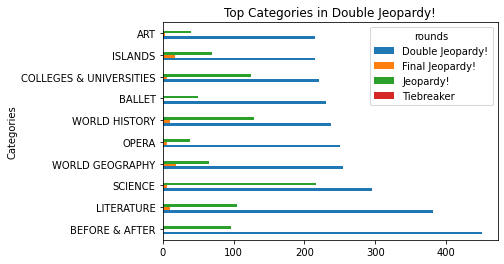

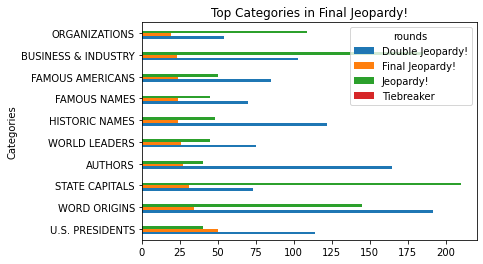

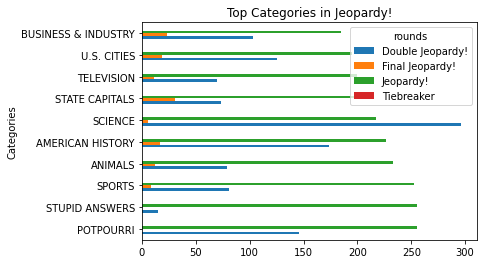

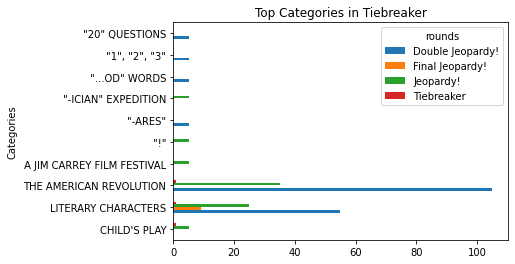

In [49]:
for round in round_type:
    top_categories[round][0:10].plot(kind = 'barh', 
                                              title = 'Top Categories in {round}'.format(round = round),
                                              xlabel = 'Categories'
                                    )

#### Plots using percentages in each typer of round instead of total number of questions
The plots above use the total number of questions in each category, but as each type of round has a different number of questions in the dataset it is difficult to compare the categories that way. It would help to calculate percentages to be able to compare the types of rounds:

1. Get the total number of questions in each type of round

2. For each type of round:
    + Get the percentage of questions for each category
    + Repeat sorting and ploting


##### Get the total number of questions in each type of round
Number of categories by type of round:

In [50]:
categories_by_round.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27995 entries,  A JIM CARREY FILM FESTIVAL to “WH”AT IS IT?
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Double Jeopardy!  14576 non-null  float64
 1   Final Jeopardy!   1952 non-null   float64
 2   Jeopardy!         15155 non-null  float64
 3   Tiebreaker        3 non-null      float64
dtypes: float64(4)
memory usage: 1.1+ MB


Number of questions by type of round:

In [51]:
questions_in_rounds = { round: categories_by_round[round].sum() for round in round_type }

In [52]:
questions_in_rounds

{'Double Jeopardy!': 105912.0,
 'Final Jeopardy!': 3631.0,
 'Jeopardy!': 107384.0,
 'Tiebreaker': 3.0}

##### Get the percentage of questions for category in each round type
Each column (round type) will be divided by the total number of questions in that round type.

First we need a list with the multiplier for each column (1/number of questions in that round). The list is needed to be able to use `pandas.DataFrame.multiply` (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.multiply.html))

In [53]:
multiplier = [ (1/questions_in_rounds[round])*100 for round in round_type]
multiplier

[0.0009441800740237178,
 0.02754062241806665,
 0.000931237428294718,
 33.33333333333333]

In [54]:
# Check the conversion for one type of round
categories_by_round.sort_values(
    'Jeopardy!',
    axis = 0,
    ascending = False)\
.multiply(multiplier)

rounds,Double Jeopardy!,Final Jeopardy!,Jeopardy!,Tiebreaker
category,,,,
POTPOURRI,0.137850,NaN,0.237466,NaN
STUPID ANSWERS,0.014163,NaN,0.237466,NaN
SPORTS,0.076479,0.220325,0.235603,NaN
ANIMALS,0.074590,0.330487,0.216978,NaN
AMERICAN HISTORY,0.164287,0.468191,0.211391,NaN
...,...,...,...,...
“HARD” & “EASY” MOVIES,0.004721,NaN,NaN,NaN
“R” MOVIES,0.004721,NaN,NaN,NaN
“SAINTS”,0.003777,NaN,NaN,NaN


Now we apply the same logic to get four dataframes, one for each round type, as we want to compare the top categories in each round.

In [55]:
top_categories_percent = {}
for round in round_type:
    top_categories_percent[round] = categories_by_round.sort_values(
                                                                    round,
                                                                    axis = 0,
                                                                    ascending = False)\
                                                        .multiply(multiplier)

In [56]:
# Check the logic for one ot the dataframes... all columns should sum 100%
top_categories_percent['Double Jeopardy!'].sum()

rounds
Double Jeopardy!    100.0
Final Jeopardy!     100.0
Jeopardy!           100.0
Tiebreaker          100.0
dtype: float64

##### Plot
Same as before, but using the dataframes with the percentages

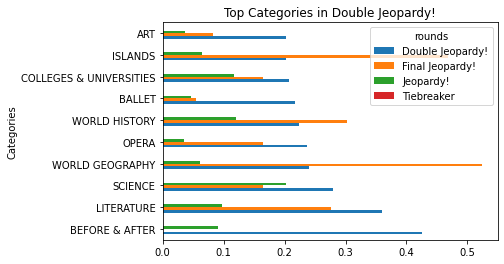

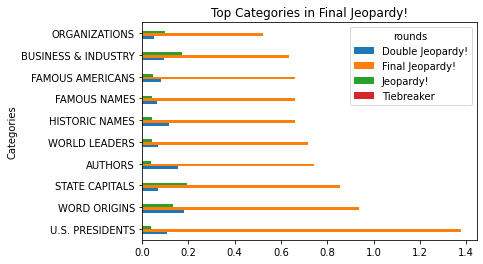

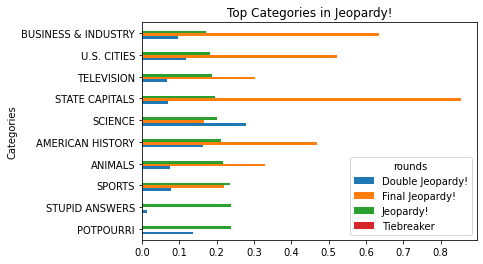

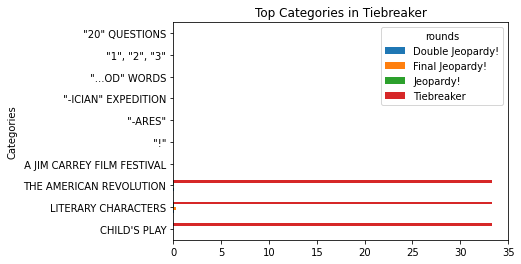

In [57]:
for round in round_type:
    top_categories_percent[round][0:10].plot(kind = 'barh', 
                                              title = 'Top Categories in {round}'.format(round = round),
                                              xlabel = 'Categories'
                                    )

The top categories are still the same for each round, but now it is posible to compare between rounds. 

Plots aside, we can compare any category. For example in the project they ask: 

>Are you more likely to find certain categories, like "Literature" in Single Jeopardy or Double Jeopardy?

Looking at percentages we can say in which round it is more frequent:

In [58]:
top_categories_percent['Double Jeopardy!'].loc['LITERATURE']

rounds
Double Jeopardy!    0.359733
Final Jeopardy!     0.275406
Jeopardy!           0.097780
Tiebreaker               NaN
Name: LITERATURE, dtype: float64

It is more frequent in 'Double Jeopardy!', but it is also quite frequent in 'Final Jeopardy!'.

On the other hand, looking at the number of questions it is not posible to compare:

In [59]:
top_categories['Double Jeopardy!'].loc['LITERATURE']

rounds
Double Jeopardy!    381.0
Final Jeopardy!      10.0
Jeopardy!           105.0
Tiebreaker            NaN
Name: LITERATURE, dtype: float64

Is 'Literature' a common category in 'Final Jeopardy!'? With only 10 questions maybe it wouldn't seem so, but as we have seen it is a common category. In fact it is in the top 50 categories in 'Final Jeopardy!'

In [60]:
top_categories['Final Jeopardy!'].index.get_loc('LITERATURE')

47

## References
* [Regular Expressions Documentation - Groups](https://docs.python.org/3/library/re.html#index-17)

* [Pandas documentation - pandas.Series.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html?highlight=replace#pandas.Series.replace)

* [Pandas documentation - convert to categorical dtype](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=string#series-creation)

* [pandas.Series.str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html?highlight=str%20contains#pandas.Series.str.contains): Test if pattern or regex is contained within a string of a Series or Index.

* [Create empty dataframe in Pandas](https://www.geeksforgeeks.org/create-empty-dataframe-in-pandas/): How to create and empty dataFrame in pandas

* [Stackoverflow: Pandas DataFrame: How to select rows on multiple conditions?](https://stackoverflow.com/a/45591012/15621830) Using pd.dataFrame.all() to filter rows by booleans.

* [pandas.DataFrame.all](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html?highlight=all#pandas.DataFrame.all): Return whether all elements are True, potentially over an axis.

* [How to Show All Columns, Rows and Values in Pandas](https://blog.softhints.com/pandas-display-all-columns-and-show-more-rows/)

* [How to search for words with regex](https://stackoverflow.com/questions/15863066/python-regular-expression-match-whole-word): Following the first answer, that uses `r'\bword\b'` (`\b` is the "word boundary" character class in the regex module, `re`), but compiling the pattern as in [this other answer](https://stackoverflow.com/a/52304664/15621830).

* [`pandas.DataFrame.duplicated`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated#pandas.DataFrame.duplicated): How to mark all duplicates as True with `keep = False` (not the first or last occurrence, but both).

* [Stackoverflow: what's the inverse of the quantile function on a pandas Series?](https://stackoverflow.com/a/33782239)

* [scipy.stats.percentileofscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html): Compute the percentile rank of a score relative to a list of scores.

* [Stackoverflow: Bar plot with groupby](https://stackoverflow.com/questions/48238305/bar-plot-with-groupby): The answer explains how to unstack and change level and also has an example of horizontal barplots with pandas.

* [`pandas.DataFrame.sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values): Sort by the values along either axis.

* [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot): Make plots of Series or DataFrame.

* [`pandas.DataFrame.multiply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.multiply.html): Get Multiplication of dataframe and other, element-wise.

* [Stackoverflow: How do i find the `iloc` of a row in pandas dataframe?](https://stackoverflow.com/a/34897532)

* [`pandas.Index.get_loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_loc.html)